In [72]:
#barcha kutubxonalarni shu yerda import qilib oldim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn.metrics import *

In [73]:
# from google.colab import drive
# drive.mount('/content/drive')

In [74]:
# !unzip /content/drive/MyDrive/aviakompaniya.zip

Gender: yo'lovchilarning jinsi (ayol, erkak)

Customer Type: mijoz turi (sodiq mijoz, ishonchsiz mijoz)

Age: yo'lovchilarning haqiqiy yoshi

Type of Travel: yo'lovchilar parvozining maqsadi (shaxsiy sayohat, biznes sayohat)

Class: yo'lovchilar samolyotida sayohat klassi (Business, Eco, Eco Plus)

Flight distance: Ushbu sayohatning parvoz masofasi

Inflight wifi service: Parvoz ichidagi Wi-Fi xizmatidan qoniqish darajasi (0: Tegishli emas; 1-5)

Departure/Arrival time convenient: Ketish/Kelish vaqtining qoniqish darajasi

Ease of Online booking: Onlayn bron qilishdan qoniqish darajasi

Gate location: Darvoza joylashuvidan qoniqish darajasi

Food and drink: Oziq-ovqat va ichimlikdan qoniqish darajasi

Online boarding: Onlayn bortdan qoniqish darajasi

Seat comfort: O'rindiqning qulayligidan qoniqish darajasi

Inflight entertainment: Parvoz ichidagi o'yin-kulgidan qoniqish darajasi

On-board service: Bort xizmatidan qoniqish darajasi

Leg room service: oyoq xonasi xizmatidan qoniqish darajasi

Baggage handling: bagajni tashishdan qoniqish darajasi

Check-in service: Ro'yxatdan o'tish xizmatidan qoniqish darajasi

Inflight service: Parvoz ichidagi xizmatdan qoniqish darajasi

Cleanliness: Tozalikdan qoniqish darajasi

Departure Delay in Minutes: jo‘nash vaqtida kechikish daqiqalari

Arrival Delay in Minutes: yetib kelganda kechikish daqiqalari

Satisfaction: Aviakompaniyaning qoniqish darajasi (qoniqish, neytral yoki norozilik)

In [75]:
df_train = pd.read_csv("/content/train_dataset.csv" , index_col = 0)
df_test = pd.read_csv("/content/test_dataset.csv" , index_col = 0)
sample_sub = pd.read_csv("/content/sample_submission.csv" , index_col = 0)

In [76]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  object 
 1   Customer Type                      10000 non-null  object 
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  object 
 4   Class                              10000 non-null  object 
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int

In [77]:
# df_train = df_train.fillna(0)

In [78]:
df_train.corrwith(df_train['satisfaction']).abs().sort_values(ascending=False)

<ipython-input-78-c8b20bd1ef6a>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corrwith(df_train['satisfaction']).abs().sort_values(ascending=False)


satisfaction                         1.000000
Online boarding                      0.504986
Inflight entertainment               0.400900
Seat comfort                         0.342294
On-board service                     0.326426
Leg room service                     0.324368
Cleanliness                          0.310338
Flight Distance                      0.298703
Inflight wifi service                0.277395
Baggage handling                     0.247965
Inflight service                     0.240584
Checkin service                      0.232359
Food and drink                       0.207854
Ease of Online booking               0.164662
Age                                  0.144302
Departure/Arrival time convenient    0.067638
Arrival Delay in Minutes             0.048650
Departure Delay in Minutes           0.042960
Gate location                        0.007169
dtype: float64

In [79]:
# #korrilatsiyasi past ustunlarni tashlab yuboramiz
# df_train.drop(columns=['Gate location','Departure Delay in Minutes','Arrival Delay in Minutes','Departure/Arrival time convenient'],inplace=True)


In [80]:
satisfaction_rate = df_train['satisfaction'].value_counts()/len(df_train)*100

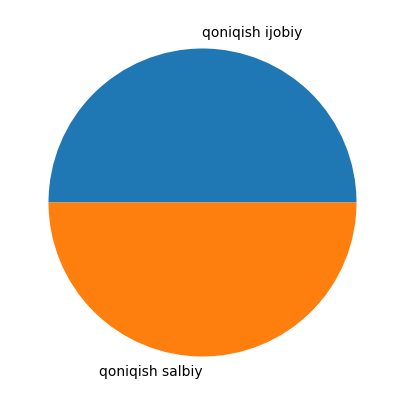

In [81]:
plt.figure(figsize=(5,5))
plt.pie(satisfaction_rate,labels=['qoniqish ijobiy','qoniqish salbiy'])
plt.show()

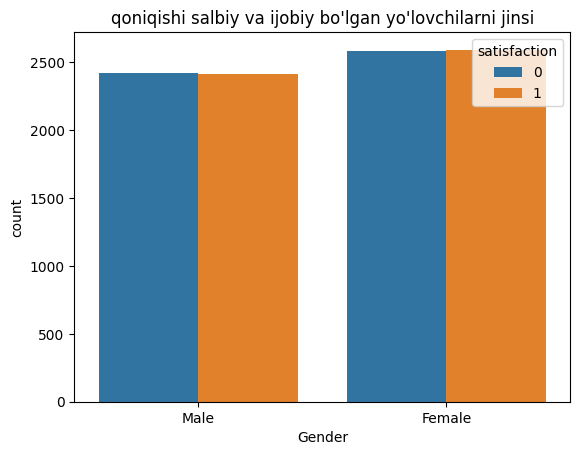

In [82]:
sns.countplot(x='Gender',hue='satisfaction',data=df_train)
plt.title("qoniqishi salbiy va ijobiy bo'lgan yo'lovchilarni jinsi")
plt.show()

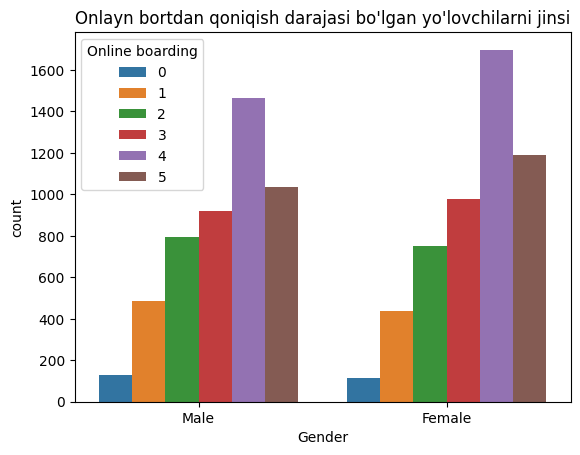

In [83]:
sns.countplot(x='Gender',hue='Online boarding',data=df_train)
plt.title("Onlayn bortdan qoniqish darajasi bo'lgan yo'lovchilarni jinsi")
plt.show()

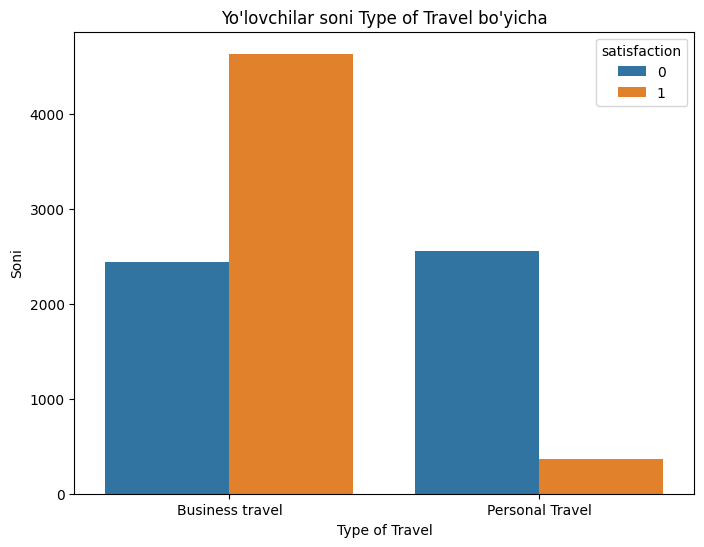

In [84]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Type of Travel', data=df_train, hue='satisfaction')
plt.title('Yo\'lovchilar soni Type of Travel bo\'yicha')
plt.xlabel('Type of Travel')
plt.ylabel('Soni')
plt.show()

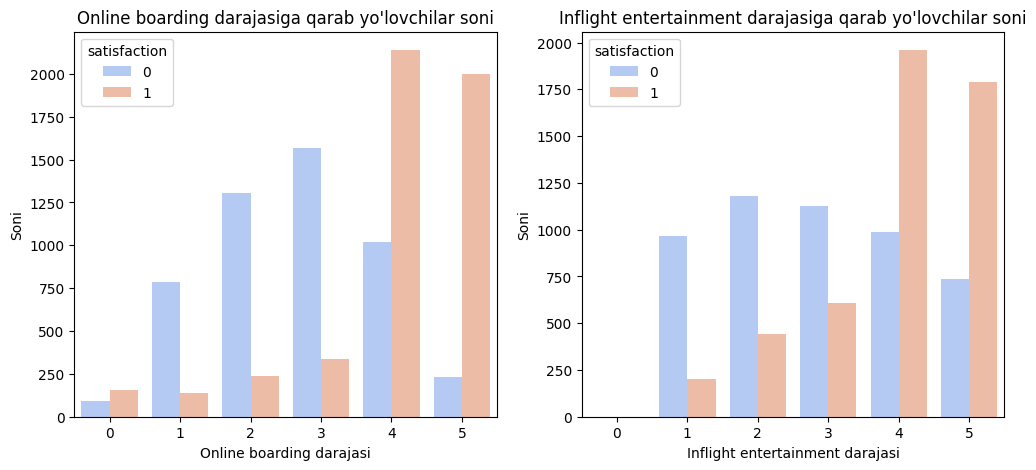

In [85]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.countplot(x='Online boarding', data=df_train, hue='satisfaction', palette='coolwarm',ax=axes[0])
axes[0].set_title('Online boarding darajasiga qarab yo\'lovchilar soni')
axes[0].set_xlabel('Online boarding darajasi')
axes[0].set_ylabel('Soni')

sns.countplot(x='Inflight entertainment', data=df_train, hue='satisfaction', palette='coolwarm',ax=axes[1])
axes[1].set_title('Inflight entertainment darajasiga qarab yo\'lovchilar soni')
axes[1].set_xlabel('Inflight entertainment darajasi')
axes[1].set_ylabel('Soni')
plt.show()


In [86]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  object 
 1   Customer Type                      10000 non-null  object 
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  object 
 4   Class                              10000 non-null  object 
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int

In [87]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  object 
 1   Customer Type                      10000 non-null  object 
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  object 
 4   Class                              10000 non-null  object 
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int

In [88]:
num_var = df_train.select_dtypes(include=['int']).columns[5:]
num_var

Index(['Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'satisfaction'],
      dtype='object')

In [89]:
df_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0


In [90]:
df_train["Ease of Online booking"].value_counts()

3    2280
2    2225
4    1982
1    1615
5    1429
0     469
Name: Ease of Online booking, dtype: int64

In [91]:
np.percentile(df_train['Flight Distance'] ,25)
np.percentile(df_train['Flight Distance'] ,75)
iqr = np.percentile(df_train['Flight Distance'] ,75) - np.percentile(df_train['Flight Distance'] ,25)
lower_bound = np.percentile(df_train['Flight Distance'] ,25) - (1.5*iqr)
upper_bound = np.percentile(df_train['Flight Distance'] ,75) + (1.5*iqr)

In [92]:
df_train.replace({'Female':0, 'Male':1}, inplace=True)
df_train.replace({'disloyal Customer':0, 'Loyal Customer':1}, inplace=True)
df_train.replace({'Business travel':1, 'Personal Travel':0}, inplace=True)
df_train.replace({'Eco':0, 'Eco Plus':1, 'Business':2}, inplace=True)

df_test.replace({'Female':0, 'Male':1}, inplace=True)
df_test.replace({'disloyal Customer':0, 'Loyal Customer':1}, inplace=True)
df_test.replace({'Business travel':1, 'Personal Travel':0}, inplace=True)
df_test.replace({'Eco':0, 'Eco Plus':1, 'Business':2}, inplace=True)

In [93]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  int64  
 1   Customer Type                      10000 non-null  int64  
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  int64  
 4   Class                              10000 non-null  int64  
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int

In [94]:
median  = df_train['Arrival Delay in Minutes'].median()
df_train['Arrival Delay in Minutes'].fillna(median, inplace=True)
df_train = df_train.astype({'Arrival Delay in Minutes': 'int64'})

median  = df_test['Arrival Delay in Minutes'].median()
df_test['Arrival Delay in Minutes'].fillna(median, inplace=True)
df_test = df_test.astype({'Arrival Delay in Minutes': 'int64'})

In [95]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Gender                             10000 non-null  int64
 1   Customer Type                      10000 non-null  int64
 2   Age                                10000 non-null  int64
 3   Type of Travel                     10000 non-null  int64
 4   Class                              10000 non-null  int64
 5   Flight Distance                    10000 non-null  int64
 6   Inflight wifi service              10000 non-null  int64
 7   Departure/Arrival time convenient  10000 non-null  int64
 8   Ease of Online booking             10000 non-null  int64
 9   Gate location                      10000 non-null  int64
 10  Food and drink                     10000 non-null  int64
 11  Online boarding                    10000 non-null  int64
 12  Seat comfort      

In [96]:
df_train.corrwith(df_train['satisfaction']).abs().sort_values(ascending=False)

satisfaction                         1.000000
Class                                0.518931
Online boarding                      0.504986
Type of Travel                       0.482266
Inflight entertainment               0.400900
Seat comfort                         0.342294
On-board service                     0.326426
Leg room service                     0.324368
Cleanliness                          0.310338
Flight Distance                      0.298703
Inflight wifi service                0.277395
Baggage handling                     0.247965
Inflight service                     0.240584
Checkin service                      0.232359
Food and drink                       0.207854
Customer Type                        0.181592
Ease of Online booking               0.164662
Age                                  0.144302
Departure/Arrival time convenient    0.067638
Arrival Delay in Minutes             0.048573
Departure Delay in Minutes           0.042960
Gate location                     

In [97]:
print(f"Mavjud bo'lmagan qiymatlar soni: {df_train.isnull().sum().sum()}")
#mavjud bo'lmagan qatorlar soni
missing_rows = df_train[df_train.isnull().any(axis=1)].shape[0]
print(f"Mavjud bo'lmagan qatorlar soni: {missing_rows}")
#qatorlar nisbati
print(f"Mavjud bo'lmagan qatorlar %: {np.round(missing_rows/len(df_train)*100)}%")

Mavjud bo'lmagan qiymatlar soni: 0
Mavjud bo'lmagan qatorlar soni: 0
Mavjud bo'lmagan qatorlar %: 0.0%


In [98]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1 to 4000
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Gender                             4000 non-null   int64
 1   Customer Type                      4000 non-null   int64
 2   Age                                4000 non-null   int64
 3   Type of Travel                     4000 non-null   int64
 4   Class                              4000 non-null   int64
 5   Flight Distance                    4000 non-null   int64
 6   Inflight wifi service              4000 non-null   int64
 7   Departure/Arrival time convenient  4000 non-null   int64
 8   Ease of Online booking             4000 non-null   int64
 9   Gate location                      4000 non-null   int64
 10  Food and drink                     4000 non-null   int64
 11  Online boarding                    4000 non-null   int64
 12  Seat comfort        

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
scaler = StandardScaler()
train_set, test_set = train_test_split(df_train, test_size=0.1, random_state=20)

In [100]:
x = train_set.drop("satisfaction" , axis=1)
y = train_set['satisfaction'].copy()
pipeline = Pipeline([
          ('imputer', SimpleImputer(strategy='median')),
          ('std_scaler', StandardScaler())
])

In [101]:
x_prep = pipeline.fit_transform(x)
x_prep[0:2 , :]

array([[-0.96548419,  0.45595127,  0.84963514,  0.64065376,  0.9594569 ,
         1.58935244, -0.57325398, -0.04012402,  0.14444073,  0.0105614 ,
        -0.90965743, -0.25510386, -0.37432135, -1.05737277, -1.14483555,
        -1.08002147, -1.41694618, -0.29101398, -1.43714829,  0.52703327,
         0.47621529,  0.46587302],
       [-0.96548419,  0.45595127, -1.64600741,  0.64065376,  0.9594569 ,
         0.35551823,  1.63156902,  1.27064262,  1.55514777,  1.5688008 ,
         0.58813197,  0.48504274,  0.38908045,  0.44410324,  1.21492931,
        -1.08002147,  0.26822272,  0.5036237 ,  0.26945345,  0.52703327,
        -0.36755375, -0.37108031]])

In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

rf_model = RandomForestRegressor()
rf_model.fit(x_prep, y)

RandomForestRegressor()

In [103]:
test_data = x.sample(9000)
test_data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,,,,,
2578,1,1,22,0,0,990,4,5,4,1,...,5,2,3,4,2,5,5,5,243,267
2289,0,0,22,1,0,202,2,0,2,3,...,1,1,4,5,4,4,5,1,0,0
5436,1,1,22,1,2,907,5,5,5,5,...,4,4,3,2,4,4,5,4,0,13
7918,0,1,14,0,0,1440,1,4,1,3,...,1,1,5,4,3,5,4,1,33,36
9120,1,1,48,1,0,1190,1,5,4,4,...,1,1,2,5,1,1,1,1,25,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,0,1,43,1,2,369,3,3,3,3,...,5,2,2,2,2,3,2,3,19,12
8791,1,1,51,1,2,2366,1,5,4,5,...,1,4,4,3,1,1,4,3,0,0
5542,1,1,18,0,0,1947,3,5,3,1,...,3,3,4,3,4,5,5,3,88,83


In [104]:
test_label = y.loc[test_data.index]
test_label

id
2578    0
2289    0
5436    1
7918    0
9120    0
       ..
9595    1
8791    0
5542    0
2303    0
6510    0
Name: satisfaction, Length: 9000, dtype: int64

In [105]:
test_data_prep = pipeline.transform(test_data)
test_data_prep

array([[ 1.03574974,  0.45595127, -1.17385882, ...,  1.29060368,
         5.84565467,  6.40063297],
       [-0.96548419, -2.19321684, -1.17385882, ..., -1.76367798,
        -0.36755375, -0.37108031],
       [ 1.03574974,  0.45595127, -1.17385882, ...,  0.52703327,
        -0.36755375, -0.04137142],
       ...,
       [ 1.03574974,  0.45595127, -1.44365802, ..., -0.23653715,
         1.88249704,  1.73398412],
       [-0.96548419, -2.19321684, -0.29701144, ..., -1.00010756,
        -0.36755375, -0.34571808],
       [-0.96548419,  0.45595127, -1.71345721, ..., -0.23653715,
         1.57567193,  1.50572412]])

              precision    recall  f1-score   support

           0       0.50      0.50      0.50      4519
           1       0.50      0.50      0.50      4481

    accuracy                           0.50      9000
   macro avg       0.50      0.50      0.50      9000
weighted avg       0.50      0.50      0.50      9000

Model aniqligi: 0.5003333333333333


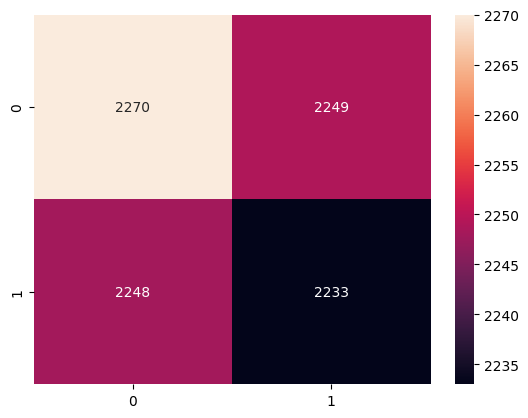

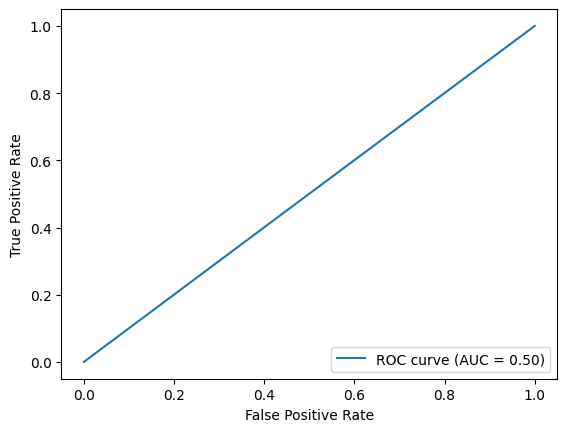

In [106]:
# from xgboost import XGBClassifier

# xgb_model = XGBClassifier()
# xgb_model.fit(x_prep, y)
# y_pred = xgb_model.predict(test_data_prep)

# print(metrics.classification_report(y, y_pred))
# print("Model aniqligi:", metrics.accuracy_score(y,y_pred))

# conf_mat = metrics.confusion_matrix(y, y_pred)
# sns.heatmap(conf_mat, annot=True,fmt="g")
# plt.show()

# fpr, tpr, thresholds = metrics.roc_curve(y, y_pred)
# roc_auc = metrics.auc(fpr, tpr)
# display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
# display.plot()
# plt.show()

In [107]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 9958 to 870
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Gender                             1000 non-null   int64
 1   Customer Type                      1000 non-null   int64
 2   Age                                1000 non-null   int64
 3   Type of Travel                     1000 non-null   int64
 4   Class                              1000 non-null   int64
 5   Flight Distance                    1000 non-null   int64
 6   Inflight wifi service              1000 non-null   int64
 7   Departure/Arrival time convenient  1000 non-null   int64
 8   Ease of Online booking             1000 non-null   int64
 9   Gate location                      1000 non-null   int64
 10  Food and drink                     1000 non-null   int64
 11  Online boarding                    1000 non-null   int64
 12  Seat comfort      

In [108]:
x_test = test_set.drop('satisfaction' , axis=1)
x_test

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,,,,,
9958,1,1,50,1,2,1979,3,3,4,3,...,5,3,3,3,3,2,3,1,0,0
1688,0,1,53,1,2,3083,0,0,0,5,...,5,2,2,2,2,1,2,1,0,0
2117,0,1,25,1,2,1553,4,4,4,4,...,4,4,5,4,1,1,1,4,0,0
232,1,1,37,1,1,521,4,5,5,5,...,4,4,5,3,1,5,1,4,0,0
2781,0,1,42,1,0,1009,2,4,4,4,...,2,2,2,2,2,3,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4597,1,1,50,1,2,2168,3,3,3,3,...,5,5,5,5,5,4,5,4,6,24
5215,0,1,47,1,2,308,0,0,0,3,...,4,4,4,4,4,4,4,5,2,0
6125,0,0,36,1,2,1389,2,2,2,2,...,5,5,5,2,5,5,5,5,2,0


In [109]:
x_test = test_set.drop('satisfaction' , axis=1)
x_test

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,,,,,
9958,1,1,50,1,2,1979,3,3,4,3,...,5,3,3,3,3,2,3,1,0,0
1688,0,1,53,1,2,3083,0,0,0,5,...,5,2,2,2,2,1,2,1,0,0
2117,0,1,25,1,2,1553,4,4,4,4,...,4,4,5,4,1,1,1,4,0,0
232,1,1,37,1,1,521,4,5,5,5,...,4,4,5,3,1,5,1,4,0,0
2781,0,1,42,1,0,1009,2,4,4,4,...,2,2,2,2,2,3,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4597,1,1,50,1,2,2168,3,3,3,3,...,5,5,5,5,5,4,5,4,6,24
5215,0,1,47,1,2,308,0,0,0,3,...,4,4,4,4,4,4,4,5,2,0
6125,0,0,36,1,2,1389,2,2,2,2,...,5,5,5,2,5,5,5,5,2,0


In [110]:
x_data_prep = pipeline.fit_transform(x_test)
x_data_prep

array([[ 1.02224741,  0.41015156,  0.70091861, ..., -1.75368408,
        -0.33702763, -0.33513441],
       [-0.97823676,  0.41015156,  0.89418661, ..., -1.75368408,
        -0.33702763, -0.33513441],
       [-0.97823676,  0.41015156, -0.90964805, ...,  0.51108228,
        -0.33702763, -0.33513441],
       ...,
       [-0.97823676, -2.43812314, -0.20099872, ...,  1.2660044 ,
        -0.29185875, -0.33513441],
       [-0.97823676,  0.41015156,  0.12111461, ...,  1.2660044 ,
        -0.33702763, -0.33513441],
       [-0.97823676, -2.43812314, -1.03849339, ..., -1.75368408,
        -0.33702763, -0.33513441]])

In [111]:
y_test = test_set['satisfaction'].copy()
y_test

id
9958    1
1688    1
2117    1
232     1
2781    0
       ..
4597    1
5215    1
6125    0
6259    1
870     0
Name: satisfaction, Length: 1000, dtype: int64

In [112]:
y_predict = rf_model.predict(x_data_prep)

In [113]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, y_predict)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

0.1989922109028391


In [114]:
sub = pipeline.fit_transform(df_test)

In [115]:
sub_pred = rf_model.predict(sub)
sub_pred

array([0.  , 0.45, 1.  , ..., 0.01, 0.6 , 0.  ])

In [116]:
sample_sub['satisfaction'] = sub_pred

In [117]:
sample_sub

,satisfaction
id,
1,0.00
2,0.45
3,1.00
4,1.00
5,0.21
...,...
3996,0.96
3997,0.00
3998,0.01


In [118]:
sample_sub.to_csv("submission_2c.csv")